## Import Dependencies in Python

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

## Import Oil Dataset in DataFrame

In [4]:
oil_df = pd.read_csv('model_data.csv')
oil_df

,Unnamed: 0,WTI,BRENT,ARAB_LIGHT,RIGS,FUEL_CONS,USA_OIL
0,1,22.69,20.50,19.73,514,100.859751,11.311850
1,2,21.55,19.20,18.71,492,100.248437,11.264940
2,3,20.34,17.95,16.76,478,99.413921,11.085530
3,4,18.50,16.35,14.86,484,100.126514,11.155130
4,5,17.47,15.30,14.72,493,99.861039,11.027760
...,...,...,...,...,...,...,...
361,362,44.83,51.31,52.48,678,68.295183,7.327776
362,363,20.51,14.85,24.14,663,68.269186,7.437338
363,364,19.23,18.11,22.30,471,66.229312,7.367632
364,365,35.57,34.15,31.84,267,66.664741,7.316165


# Step 1) Examining Number of Rigs as a Predictor of Oil Prices using Linear Regression

## Step 1a) Linear Regression Predicting WTI Oil Prices from Number of Rigs

In [3]:
X = oil_df["RIGS"] 
y = oil_df["WTI"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WTI   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     242.9
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.62e-42
Time:                        20:56:48   Log-Likelihood:                -1661.1
No. Observations:                 366   AIC:                             3326.
Df Residuals:                     364   BIC:                             3334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2092      1.973     11.763      0.000      19.329      27.089
RIGS           0.0489      0.003     15.584      0.000       0.043       0.055
==============================================================================
Omnibus:                       65.323   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.527
Skew:                           1.078   Prob(JB):                     3.31e-23
Kurtosis:                       4.464   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results: As we can see from the regression table above, there is a statistically significant positive association between the number of rigs and WTI oil price (b = 0.05, t = 15.58, p <.001). Therefore, we reject the null hypothesis.

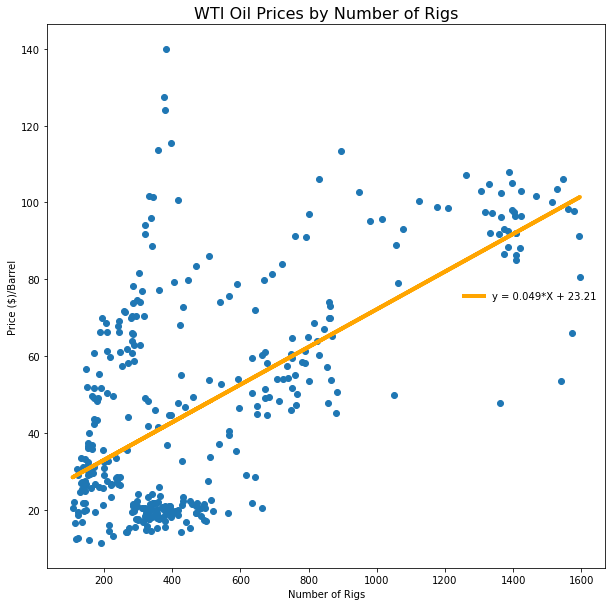

In [4]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat=0.049*X + 23.21
fig = plt.plot(X,yhat,lw=4, c='orange', label='y = 0.049*X + 23.21')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('Number of Rigs')
ax.set_ylabel('Price ($)/Barrel')
plt.title('WTI Oil Prices by Number of Rigs', fontsize=16)
plt.show()

## Step 1b) Linear Regression Predicting BRENT Oil Prices from Number of Rigs

In [5]:
X = oil_df["RIGS"] 
y = oil_df["BRENT"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BRENT   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     344.7
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.31e-54
Time:                        20:56:52   Log-Likelihood:                -1674.5
No. Observations:                 366   AIC:                             3353.
Df Residuals:                     364   BIC:                             3361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7118      2.047      9.142      0.000      14.687      22.737
RIGS           0.0604      0.003     18.565      0.000       0.054       0.067
==============================================================================
Omnibus:                       47.065   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.573
Skew:                           0.882   Prob(JB):                     9.51e-15
Kurtosis:                       4.059   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results: As we can see from the regression table above, there is a statistically significant positive association between the number of rigs and BRENT oil price (b = 0.06, t = 18.57, p <.001). Therefore, we reject the null hypothesis.

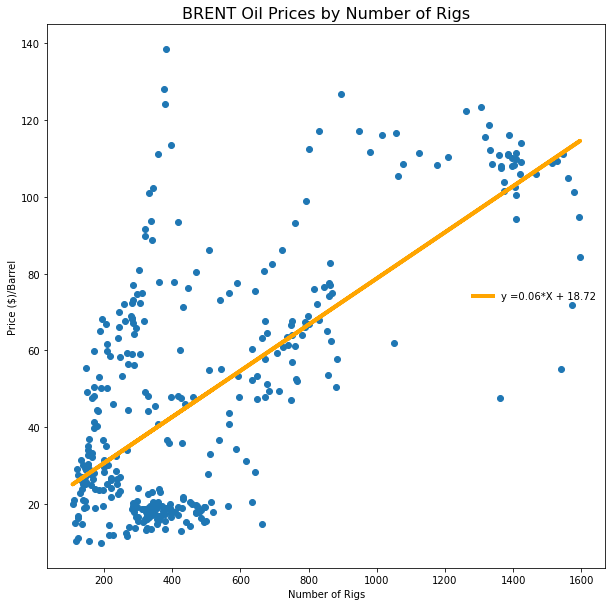

In [6]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat=0.06*X + 18.72 
fig = plt.plot(X,yhat,lw=4, c='orange', label='y =0.06*X + 18.72')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('Number of Rigs')
ax.set_ylabel('Price ($)/Barrel')
plt.title('BRENT Oil Prices by Number of Rigs', fontsize=16)
plt.show()

## Step 1c) Linear Regression Predicting ARAB LIGHT Oil Prices from Number of Rigs

In [7]:
X = oil_df["RIGS"] 
y = oil_df["ARAB_LIGHT"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ARAB_LIGHT   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     352.3
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.87e-55
Time:                        20:56:55   Log-Likelihood:                -1662.3
No. Observations:                 366   AIC:                             3329.
Df Residuals:                     364   BIC:                             3336.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0744      1.979      9.131      0.000      14.182      21.967
RIGS           0.0591      0.003     18.769      0.000       0.053       0.065
==============================================================================
Omnibus:                       52.069   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.274
Skew:                           0.938   Prob(JB):                     7.44e-17
Kurtosis:                       4.163   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results: As we can see from the regression table above, there is a statistically significant positive association between the number of rigs and ARAB LIGHT oil price (b = 0.06, t = 18.77, p <.001). Therefore, we reject the null hypothesis.

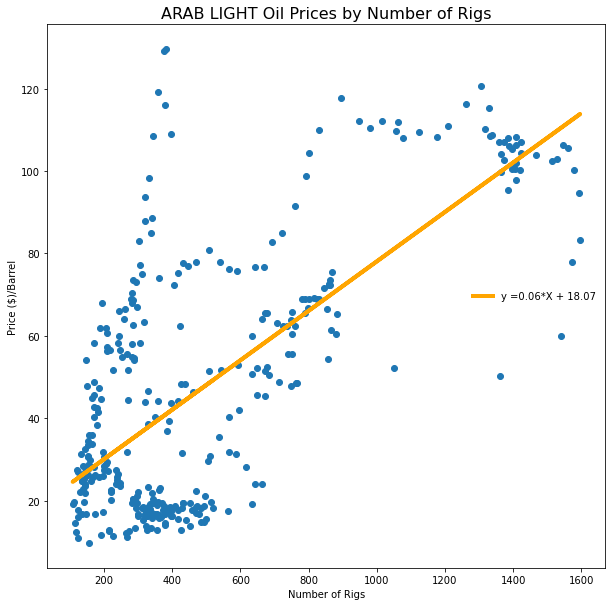

In [8]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat=0.06*X + 18.07
fig = plt.plot(X,yhat,lw=4, c='orange', label='y =0.06*X + 18.07')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('Number of Rigs')
ax.set_ylabel('Price ($)/Barrel')
plt.title('ARAB LIGHT Oil Prices by Number of Rigs', fontsize=16)
plt.show()

# Step 2) Examining Fuel Consumption as a Predictor of Oil Prices using Linear Regression

## Step 2a) Linear Regression Predicting WTI Oil Prices from Fuel Consumption

In [9]:
X = oil_df["FUEL_CONS"] 
y = oil_df["WTI"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WTI   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     281.9
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.92e-47
Time:                        20:57:03   Log-Likelihood:                -1649.7
No. Observations:                 366   AIC:                             3303.
Df Residuals:                     364   BIC:                             3311.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        199.9834      9.137     21.886      0.000     182.015     217.952
FUEL_CONS     -1.8075      0.108    -16.791      0.000      -2.019      -1.596
==============================================================================
Omnibus:                       26.778   Durbin-Watson:                   0.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.525
Skew:                           0.672   Prob(JB):                     2.35e-07
Kurtosis:                       3.440   Cond. No.                         675.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results: As we can see from the regression table above, there is a statistically significant negative association between fuel consumption and WTI oil price (b = -1.81 t = -16.79, p <.001). Therefore, we reject the null hypothesis.

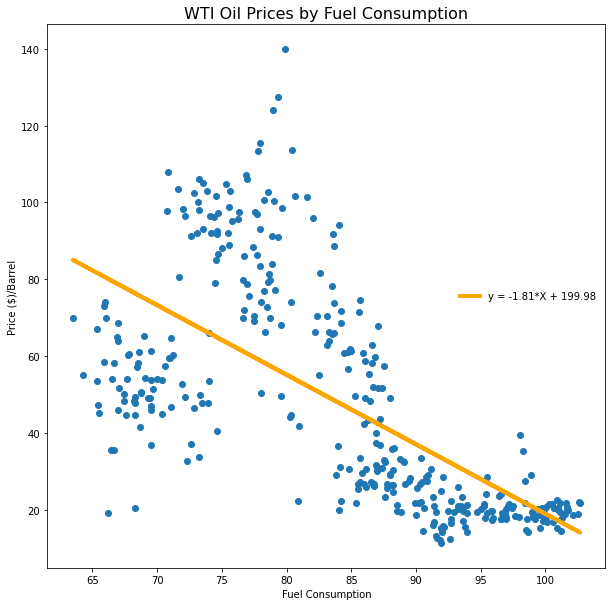

In [10]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat=-1.81*X + 199.98
fig = plt.plot(X,yhat,lw=4, c='orange', label='y = -1.81*X + 199.98')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('Fuel Consumption')
ax.set_ylabel('Price ($)/Barrel')
plt.title('WTI Oil Prices by Fuel Consumption', fontsize=16)
plt.show()

## Step 2b) Linear Regression Predicting BRENT Oil Prices from Fuel Consumption

In [11]:
X = oil_df["FUEL_CONS"] 
y = oil_df["BRENT"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BRENT   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     308.4
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           1.90e-50
Time:                        20:57:07   Log-Likelihood:                -1684.1
No. Observations:                 366   AIC:                             3372.
Df Residuals:                     364   BIC:                             3380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        223.9741     10.039     22.311      0.000     204.233     243.716
FUEL_CONS     -2.0770      0.118    -17.562      0.000      -2.310      -1.844
==============================================================================
Omnibus:                       24.104   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.977
Skew:                           0.648   Prob(JB):                     1.39e-06
Kurtosis:                       3.296   Cond. No.                         675.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results: As we can see from the regression table above, there is a statistically significant negative association between fuel consumption and BRENT oil price (b = -2.08 t = -17.56, p <.001). Therefore, we reject the null hypothesis.

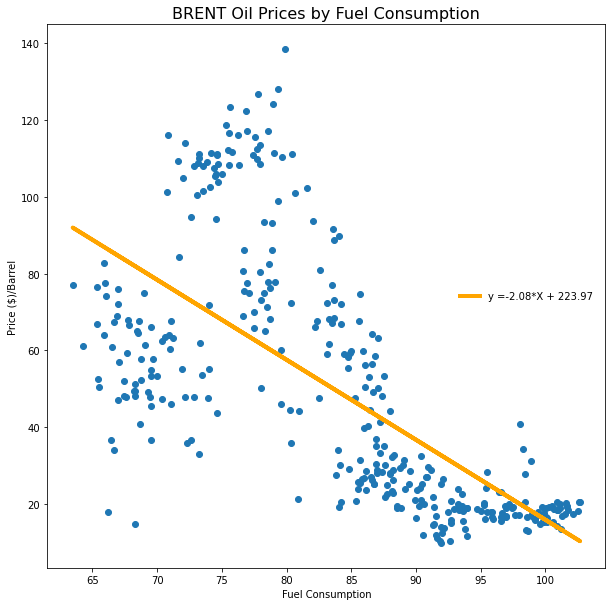

In [12]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat= -2.08*X + 223.97
fig = plt.plot(X,yhat,lw=4, c='orange', label='y =-2.08*X + 223.97 ')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('Fuel Consumption')
ax.set_ylabel('Price ($)/Barrel')
plt.title('BRENT Oil Prices by Fuel Consumption', fontsize=16)
plt.show()

## Step 2c) Linear Regression Predicting ARAB LIGHT Oil Prices from Fuel Consumption

In [13]:
X = oil_df["FUEL_CONS"] 
y = oil_df["ARAB_LIGHT"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ARAB_LIGHT   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     320.8
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           6.79e-52
Time:                        20:57:12   Log-Likelihood:                -1670.5
No. Observations:                 366   AIC:                             3345.
Df Residuals:                     364   BIC:                             3353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        219.6088      9.672     22.706      0.000     200.589     238.628
FUEL_CONS     -2.0407      0.114    -17.911      0.000      -2.265      -1.817
==============================================================================
Omnibus:                       24.755   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.851
Skew:                           0.660   Prob(JB):                     8.96e-07
Kurtosis:                       3.285   Cond. No.                         675.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results: As we can see from the regression table above, there is a statistically significant negative association between fuel consumption and ARAB LIGHT oil price (b = -2.04 t = -17.91, p <.001). Therefore, we reject the null hypothesis.

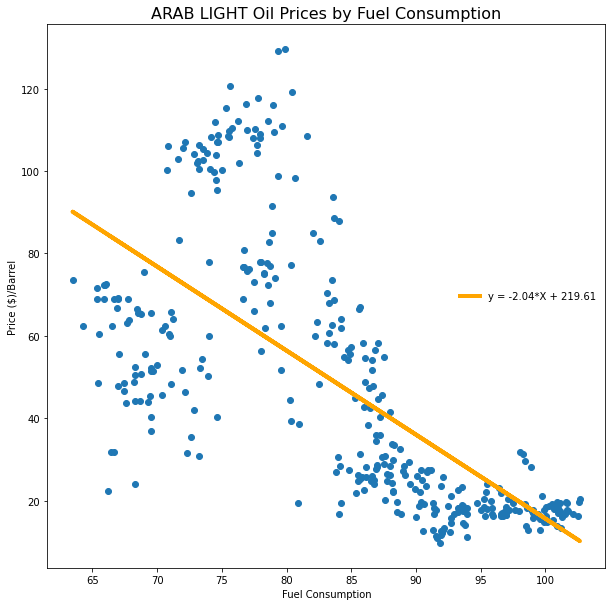

In [14]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat= -2.04*X + 219.61 
fig = plt.plot(X,yhat,lw=4, c='orange', label='y = -2.04*X + 219.61')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('Fuel Consumption')
ax.set_ylabel('Price ($)/Barrel')
plt.title('ARAB LIGHT Oil Prices by Fuel Consumption', fontsize=16)
plt.show()

# Step 3) Examining USA Oil Production as a Predictor of Oil Prices using Linear Regression

## Step 3a) Linear Regression Predicting WTI Oil Prices from USA Oil Production

In [15]:
X = oil_df["USA_OIL"] 
y = oil_df["WTI"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WTI   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     135.4
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           8.07e-27
Time:                        20:57:17   Log-Likelihood:                -1696.8
No. Observations:                 366   AIC:                             3398.
Df Residuals:                     364   BIC:                             3405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.6912      4.649     21.441      0.000      90.548     108.834
USA_OIL       -7.2802      0.626    -11.635      0.000      -8.511      -6.050
==============================================================================
Omnibus:                       16.894   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.509
Skew:                           0.506   Prob(JB):                     0.000158
Kurtosis:                       2.647   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results: As we can see from the regression table above, there is a statistically significant negative association between USA Oil Production and WTI oil price (b = -7.28, t = -11.64, p <.001). Therefore, we reject the null hypothesis.

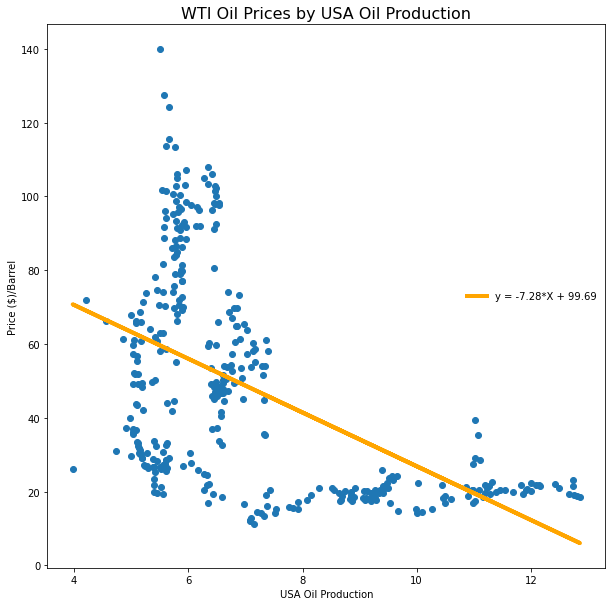

In [16]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat= -7.28*X + 99.69
fig = plt.plot(X,yhat,lw=4, c='orange', label='y = -7.28*X + 99.69')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('USA Oil Production')
ax.set_ylabel('Price ($)/Barrel')
plt.title('WTI Oil Prices by USA Oil Production', fontsize=16)
plt.show()

## Step 3b) Linear Regression Predicting BRENT Oil Prices from USA Oil Production

In [17]:
X = oil_df["USA_OIL"] 
y = oil_df["BRENT"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BRENT   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     117.5
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           6.49e-24
Time:                        20:57:21   Log-Likelihood:                -1745.2
No. Observations:                 366   AIC:                             3494.
Df Residuals:                     364   BIC:                             3502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.2832      5.308     19.647      0.000      93.845     114.721
USA_OIL       -7.7426      0.714    -10.840      0.000      -9.147      -6.338
==============================================================================
Omnibus:                       22.528   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.973
Skew:                           0.572   Prob(JB):                     1.03e-05
Kurtosis:                       2.556   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results: As we can see from the regression table above, there is a statistically significant negative association between USA Oil Production and BRENT oil price (b = -7.74, t = -10.84, p <.001). Therefore, we reject the null hypothesis.

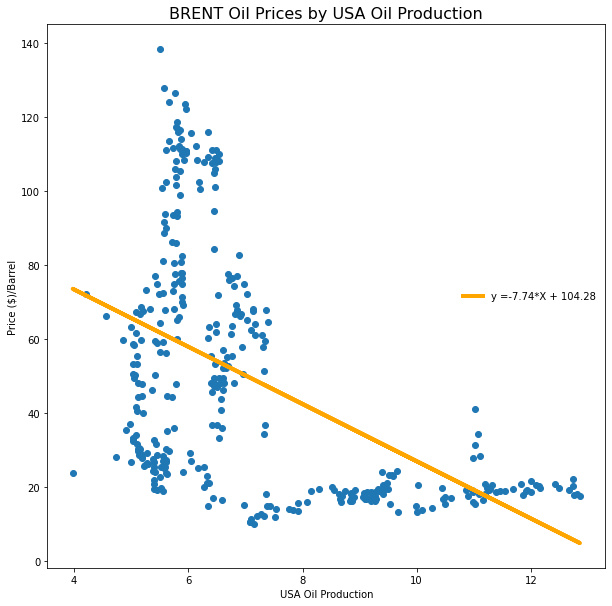

In [18]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat= -7.74*X + 104.28 
fig = plt.plot(X,yhat,lw=4, c='orange', label='y =-7.74*X + 104.28')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('USA Oil Production')
ax.set_ylabel('Price ($)/Barrel')
plt.title('BRENT Oil Prices by USA Oil Production', fontsize=16)
plt.show()

## Step 3c) Linear Regression Predicting ARAB LIGHT Oil Prices from USA Oil Production

In [19]:
X = oil_df["USA_OIL"] 
y = oil_df["ARAB_LIGHT"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ARAB_LIGHT   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     119.4
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           3.20e-24
Time:                        20:57:24   Log-Likelihood:                -1734.2
No. Observations:                 366   AIC:                             3472.
Df Residuals:                     364   BIC:                             3480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.7549      5.151     19.756      0.000      91.626     111.884
USA_OIL       -7.5725      0.693    -10.925      0.000      -8.936      -6.209
==============================================================================
Omnibus:                       23.763   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.823
Skew:                           0.556   Prob(JB):                     1.11e-05
Kurtosis:                       2.490   Cond. No.                         26.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Results: As we can see from the regression table above, there is a statistically significant negative association between USA Oil Production and ARAB LIGHT oil price (b = -7.57, t = -10.93, p <.001). Therefore, we reject the null hypothesis.

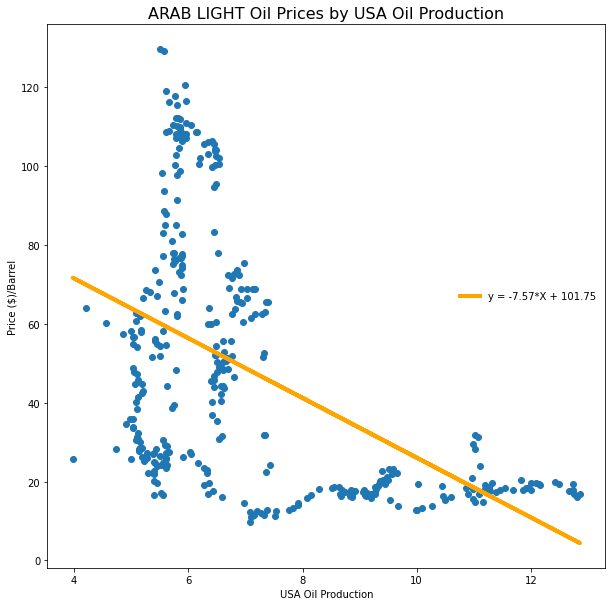

In [20]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(X, y)
yhat=-7.57*X + 101.75
fig = plt.plot(X,yhat,lw=4, c='orange', label='y = -7.57*X + 101.75')
plt.legend(loc='right',frameon=False)
plt
ax.set_xlabel('USA Oil Production')
ax.set_ylabel('Price ($)/Barrel')
plt.title('ARAB LIGHT Oil Prices by USA Oil Production', fontsize=16)
plt.show()

# Step 4) Multiple Linear Regressions Predicting Oil Prices from Number of Rigs, Fuel Consumption, and USA Oil Production Simultaneously

## Step 4a) Multiple Linear Regressions for WTI Oil Price

In [22]:
X = oil_df[["RIGS","FUEL_CONS","USA_OIL"]] 
y = oil_df["WTI"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WTI   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     223.1
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           6.07e-82
Time:                        21:00:44   Log-Likelihood:                -1563.0
No. Observations:                 366   AIC:                             3134.
Df Residuals:                     362   BIC:                             3150.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.9918     10.362      8.878      0.000      71.615     112.368
RIGS           0.0435      0.003     13.817      0.000       0.037       0.050
FUEL_CONS     -0.2612      0.137     -1.904      0.058      -0.531       0.009
USA_OIL       -6.1793      0.588    -10.508      0.000      -7.336      -5.023
==============================================================================
Omnibus:                       98.272   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.985
Skew:                           1.258   Prob(JB):                     2.36e-59
Kurtosis:                       6.373   Cond. No.                     7.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results: When examining the 3 predictors simultaneously in a multiple linear regression, we find that the number of rigs and USA oil production remain statistically significant predictors of WTI Oil Prices, but fuel consumption is reduced to non-significance. This suggests that fuel consumption may not be as important of a predictor of WTI oil prices relative to rig count and USA oil production.

## Step 4b) Multiple Linear Regressions for BRENT Oil Price

In [23]:
X = oil_df[["RIGS","FUEL_CONS","USA_OIL"]] 
y = oil_df["BRENT"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BRENT   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     290.6
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           5.29e-96
Time:                        21:04:45   Log-Likelihood:                -1572.1
No. Observations:                 366   AIC:                             3152.
Df Residuals:                     362   BIC:                             3168.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.2171     10.620      8.589      0.000      70.332     112.102
RIGS           0.0547      0.003     16.965      0.000       0.048       0.061
FUEL_CONS     -0.2751      0.141     -1.957      0.051      -0.552       0.001
USA_OIL       -6.5174      0.603    -10.813      0.000      -7.703      -5.332
==============================================================================
Omnibus:                       76.310   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.013
Skew:                           0.993   Prob(JB):                     6.09e-44
Kurtosis:                       6.017   Cond. No.                     7.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results: When examining the 3 predictors simultaneously in a multiple linear regression, we find that the number of rigs and USA oil production remain statistically significant predictors of BRENT Oil Prices, but fuel consumption is reduced to non-significance. This suggests that fuel consumption may not be as important of a predictor of BRENT oil prices relative to rig count and USA oil production.

## Step 4c) Multiple Linear Regressions for ARAB LIGHT Oil Price

In [27]:
X = oil_df[["RIGS","FUEL_CONS","USA_OIL"]] 
y = oil_df["ARAB_LIGHT"] 
b0 = sm.add_constant(X) ## adding intercept to model

model = sm.OLS(y, b0).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ARAB_LIGHT   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     303.1
Date:                Thu, 15 Oct 2020   Prob (F-statistic):           2.29e-98
Time:                        21:05:58   Log-Likelihood:                -1556.2
No. Observations:                 366   AIC:                             3120.
Df Residuals:                     362   BIC:                             3136.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.7969     10.171      8.927      0.000      70.795     110.799
RIGS           0.0531      0.003     17.197      0.000       0.047       0.059
FUEL_CONS     -0.2945      0.135     -2.187      0.029      -0.559      -0.030
USA_OIL       -6.3011      0.577    -10.916      0.000      -7.436      -5.166
==============================================================================
Omnibus:                       89.939   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.810
Skew:                           1.159   Prob(JB):                     5.11e-53
Kurtosis:                       6.227   Cond. No.                     7.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results: When examining the 3 predictors simultaneously in a multiple linear regression, we find that all three predictors remain statistically significant predictors of ARAB LIGHT Oil Prices. However, the strength of the association for the fuel consumption predictor is reduced in statistical significance in the multiple linear regression (b = -0.29, t = -2.19, p = .03) compared with the linear regression examining fuel consumption alone (b = -2.04 t = -17.91, p <.001). This suggests that fuel consumption may be a relatively less important of a predictor of BRENT oil prices relative to rig count and USA oil production.